# Graded Challenge 3

Nama  : Samuel Tatang Surja <br>
Batch : HCK-012 <br>
Objectives: Sebagai ide usaha sampingan, saya perlu melakukan riset market terlebih dahulu. Untuk itu saya akan menganalisa data dengan melakukan web scraping dari halaman pencarian produk 'seblak' di website tokopedia. Merumuskan target yang ingin dicapai dengan bantuan skema SMART, kemudian menganalisa data yang telah dibersihkan sebelumnya dan mencatat insight yang didapat dari analisa tersebut. Mengambil kesimpulan berdasarkan data untuk memutuskan langkah yang akan dilakukan supaya mencapai target yang telah ditentukan.

## 1. Web Scraping

Dalam tahap ini, saya akan mengambil data dari website tokopedia. Tepatnya halaman yang menampilkan produk-produk dengan komponen 'seblak' di namanya.

### Preparation

Pertama-tama saya perlu memasukkan library yang akan diperlukan, antara lain: <br>
- selenium.webdriver : untuk memungkinkan program mengakses browser. <br>
- bs4.BeautifulSoup : untuk membaca HTML yang digunakan dalam proses web scraping. <br>
- time : untuk memberi jeda ketika driver membuka page -> memberi waktu yang konsisten untuk program membaca dan mengekstrak informasi
- requests : untuk mengajukan HTTP requests dengan tampilan API sederhana.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import requests

Buka website di browser dengan menggunakan webdriver.

In [43]:
driver = webdriver.Edge()

### Scraping Proccess

Data yang ingin saya ambil antara lain:
- Nama Produk
- Harga Produk
- Penjual
- Kota Toko
- Banyaknya Terjual
- Rating Produk

Saya akan mengambil 6 informasi tersebut dari setiap produk yang terdapat di halaman 1-10.

In [50]:
# create empty lists to store data
list_nama = []
list_harga = []
list_penjual = []
list_kota = []
list_total_terjual = []
list_rating = []


# loop to scrape page 1-10
for page in range(1,11):
    url = f'https://www.tokopedia.com/search?navsource=&page={page}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='
    driver.get(url)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # store all 'boxes' in a variable
    boxes = soup.find_all('div', {'class': 'css-1asz3by'})

    for box in boxes:
        # load each information to the list but input None if no information is available to keep consistent indexing
        try:
            nama = box.find('div', {'class':"prd_link-product-name css-3um8ox", 'data-testid':"spnSRPProdName"})
            list_nama.append(nama.get_text())
        except:
            list_nama.append(None)

        try:
            harga = box.find('div', {'class':"prd_link-product-price css-h66vau", 'data-testid':"spnSRPProdPrice"})
            list_harga.append(harga.get_text())
        except:
            list_harga.append(None)

        try:
            penjual = box.find('span', {'class':"prd_link-shop-name css-1kdc32b flip", 'data-testid':""})
            list_penjual.append(penjual.get_text())
        except:
            list_penjual.append(None)

        try:
            kota = box.find('span', {'class':"prd_link-shop-loc css-1kdc32b flip", 'data-testid':"spnSRPProdTabShopLoc"})
            list_kota.append(kota.get_text())
        except:
            list_kota.append(None)

        try:
            total_terjual = box.find('span', {'class':"prd_label-integrity css-1sgek4h", 'data-testid':""})
            list_total_terjual.append(total_terjual.get_text())
        except:
            list_total_terjual.append(None)

        try:
            rating = box.find('span', {'class':"prd_rating-average-text css-t70v7i", 'data-testid':""})
            list_rating.append(rating.get_text())
        except:
            list_rating.append(None)
    # give 3 seconds delay inbetween page loading 
    time.sleep(3)

Sekarang saya memiliki list dari masing-masing data yang saya butuhkan. <br><br>
\# Note: <br>
Ada kemungkinan tidak semua produk dari setiap halaman berhasil diambil. Hal ini sangat normal terjadi dikarenakan faktor seperti kecepatan internet, kinerja komputer, situasi server website dan lain sebagainya.

Untuk mengubah data tersebut ke dalam bentuk dataframe (lalu kemudian .csv), saya perlu mengecek apakah jumlah data di setiap list sudah sama.

In [52]:
if (len(list_nama) == 
    len(list_harga) == 
    len(list_penjual) == 
    len(list_kota) == 
    len(list_total_terjual) == 
    len(list_rating)):  ## expected output: True
    print(f'Jumlah data per kolom sudah sama: {len(list_nama)}')
else:
    print('Jumlah data per kolom tidak sama!')

Jumlah data per kolom sudah sama: 376


Bisa dilihat bahwa jumlah data yang berhasil diperoleh dari proses web scraping ini sudah sama, <br>
artinya web scraping telah berhasil dan data bisa disimpan untuk selanjutnya diolah.

Saya akan menyimpan data yang diperoleh sebagai dataframe.

In [2]:
import pandas as pd

In [54]:
# create new dataframe with suitable column names containing all the data
df = pd.DataFrame({
    'nama_produk': list_nama,
    'harga_produk': list_harga,
    'nama_penjual': list_penjual,
    'kota_toko': list_kota,
    'total_terjual': list_total_terjual,
    'rating': list_rating
})

df.head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating
0,None,None,None,None,10 terjual,5.0
1,None,None,None,None,8 rb+ terjual,4.9
2,None,None,None,None,250+ terjual,4.9
3,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp13.000,Lidigeli,Kab. Garut,250+ terjual,4.8
4,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp22.500,Lidigeli,Kab. Garut,40+ terjual,5.0


Kemudian data mentah tersebut saya simpan ke dalam file .csv yang nantinya akan saya gunakan supaya tidak perlu melakukan web scraping lagi.

In [55]:
# save dataframe to a .csv file
df.to_csv('seblak_raw.csv', index=False)

Dengan demikian keseluruhan proses web scraping telah selesai dijalankan.

## 2. Data preparation

Data yang telah diperoleh perlu dirapikan terlebih dahulu. Langkah yang akan dilakukan:
- Data Loading: df = pd.read_csv('file.csv') <br>
- Data Exploration: df.info(), df.column <br>
- Data Cleaning: handle nulls/duplicates, change data type <br>
- Data Transformation: drop/insert unused/new column

### Data Loading

In [3]:
df = pd.read_csv('seblak_raw.csv')

Data telah berhasil dimuat dan disimpan ke dalam variabel df

### Data Exploration

Setelah memuat data, saya akan menjelajahi data tersebut supaya membantu saya merencanakan apa yang akan saya lakukan pada tahap perubahan/pembersihan data. Sebagai permulaan, saya akan menampilkan beberapa baris data.

In [195]:
df.head(15)

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating
0,NaN,NaN,NaN,NaN,10 terjual,5.0
1,NaN,NaN,NaN,NaN,8 rb+ terjual,4.9
2,NaN,NaN,NaN,NaN,250+ terjual,4.9
3,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp13.000,Lidigeli,Kab. Garut,250+ terjual,4.8
4,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp22.500,Lidigeli,Kab. Garut,40+ terjual,5.0
5,seblak instan jeletot jajanan hits bandung 1 p...,Rp4.180,tokomakanankalimantan,Jakarta Barat,1rb+ terjual,4.8
6,KERUPUK SEBLAK MENTAH ANEKA WARNA,Rp11.500,jajanangarut19,Jakarta Selatan,250+ terjual,4.9
7,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,Rp23.500,BociKakang,Jakarta Selatan,250+ terjual,5.0
8,SEBLAK INSTANT TERMURAH,Rp3.999,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10rb+ terjual,4.8
9,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,250+ terjual,4.9


Dari 15 data yang saya tampilkan saya menemukan beberapa hal yang bisa saya kerjakan pada saat pembersihan data nanti. <br>
\# To-do:
- Terdapat missing value (NaN) pada data seperti row 0,1,2 -> hapus
- Terdapat duplicate value pada data seperti row 8 & 13, 9 & 14 -> handle
- Penulisan value pada kolom total_terjual seperti 'rb' dan '+' tidak universal dan kurang precise -> handle
- penulisan ' terjual' pada kolom total_terjual bersifat redundant dengan nama kolom -> hapus <br>

\# Insight:
- Beberapa nama produk atau penjual ditulis dengan huruf besar -> tidak perlu dihandle karena akan memudahkan untuk dibedakan ketika ingin mencari produk nantinya
- lokasi toko/penjual sangat beragam. Karena saya tinggal di Jakarta, mungkin perlu menambahkan kolom untuk membedakan produk yang dikirim dari dalam/luar Jabodetabek.

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_produk    350 non-null    object 
 1   harga_produk   350 non-null    object 
 2   nama_penjual   350 non-null    object 
 3   kota_toko      350 non-null    object 
 4   total_terjual  370 non-null    object 
 5   rating         356 non-null    float64
dtypes: float64(1), object(5)
memory usage: 17.8+ KB


\# Insight:
- Seperti sudah diperkirakan, terdapat missing value di dalam data.
- Jumlah data yang non-null tidak sama, artinya ada baris yang tidak lengkap terisi -> sebaiknya dihapus karena kolom seperti nama produk, nama penjual dan kota tidak terlalu membantu analisis data sedangkan harga produk, total terjual dan rating akan mengacaukan analisis data jika diisi secara random.
- Tipe data harga_produk dan total_terjual seharusnya adalah tipe data numerik -> handle

### Data Cleaning

Sebelum melakukan pembersihan data, saya membuat duplikat dari data original terlebih dahulu.

In [5]:
# make a copy
df_clean = df.copy()
df_clean.head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating
0,NaN,NaN,NaN,NaN,10 terjual,5.0
1,NaN,NaN,NaN,NaN,8 rb+ terjual,4.9
2,NaN,NaN,NaN,NaN,250+ terjual,4.9
3,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,Rp13.000,Lidigeli,Kab. Garut,250+ terjual,4.8
4,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp22.500,Lidigeli,Kab. Garut,40+ terjual,5.0


Data telah berhasil di-copy. Saatnya melakukan pembersihan data.

### Handle missing value (NaN)
Hal pertama yang saya lakukan untuk membersihkan data adalah missing value handling atau menangani nilai yang hilang/kosong. Pada proses kali ini saya tidak akan mengambil row yang punya missing value.

In [6]:
# update df_clean: only take rows without missing value in any of their column
df_clean = df_clean.dropna().reset_index(drop=True)        
print(f'Column null count: \n{df_clean.isnull().sum()}')

Column null count: 
nama_produk      0
harga_produk     0
nama_penjual     0
kota_toko        0
total_terjual    0
rating           0
dtype: int64


Seperti bisa dilihat, sudah tidak terdapat missing value di dalam data.

### Handle duplicate rows

Langkah kedua adalah menangani baris ganda atau identik karena ini menandakan ada produk yang datanya terekam lebih dari satu kali dan berpotensi mengacaukan analisa data nantinya. Sama seperti missing value, pada proses kali ini saya akan menangani baris yang identik dengan menghapusnya dari tabel sehingga setiap baris bersifat unik. 

In [199]:
# update df_clean: drop any duplicate rows
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print(f'duplicate row(s): {df_clean.duplicated().sum()}')

duplicate row(s): 0


Seperti bisa dilihat, sudah tidak terdapat duplicate rows di dalam data. 

### Handle Data Type

In [200]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_produk    96 non-null     object 
 1   harga_produk   96 non-null     object 
 2   nama_penjual   96 non-null     object 
 3   kota_toko      96 non-null     object 
 4   total_terjual  96 non-null     object 
 5   rating         96 non-null     float64
dtypes: float64(1), object(5)
memory usage: 4.6+ KB


Langkah berikutnya untuk merapikan data adalah menyesuaikan tipe data masing-masing kolom dengan kegunaannya. Dalam hal ini ada 2 kolom yang bermasalah yaitu 'harga_produk' dan 'total_terjual'. Tipe data kedua kolom tersebut masih object dan perlu diubah ke tipe data numerik.

### Clean 'harga_produk'

In [201]:
df_clean['harga_produk'].head()

0    Rp13.000
1    Rp22.500
2     Rp4.180
3    Rp11.500
4    Rp23.500
Name: harga_produk, dtype: object

Di kolom 'harga_produk' masih terdapat nilai string seperti 'Rp' dan '.' yang tidak bisa diubah ke tipe data numerik, karena itu saya akan menghilangkannya terlebih dahulu sebelum mengubah tipe data kolom tersebut.

In [203]:
df_clean['harga_produk'] = df_clean['harga_produk'].str.replace('Rp', '')
df_clean['harga_produk'] = df_clean['harga_produk'].str.replace('.', '')
df_clean['harga_produk'].head()

0    13000
1    22500
2     4180
3    11500
4    23500
Name: harga_produk, dtype: object

Seperti bisa dilihat, nilai pada kolom 'harga_produk' sudah bersih dari 'Rp' dan '.'.

### Clean 'total_terjual'

In [204]:
df_clean['total_terjual'].head()

0    250+ terjual
1     40+ terjual
2    1rb+ terjual
3    250+ terjual
4    250+ terjual
Name: total_terjual, dtype: object

Di kolom 'total_terjual' masih terdapat nilai string seperti '+', 'rb' dan ' terjual' yang tidak bisa diubah ke tipe data numerik, karena itu sebelum mengubah tipe data kolom tersebut saya akan menanganinya dengan cara menghapus '+' dan ' terjual' serta mengganti 'rb' menjadi '000'.

In [205]:
df_clean['total_terjual'] = df_clean['total_terjual'].str.replace('+', '')      # erase '+'
df_clean['total_terjual'] = df_clean['total_terjual'].str.replace('rb', '000')      # change 'rb' to '000'
df_clean['total_terjual'] = df_clean['total_terjual'].str.replace(' terjual', '')       # erase 'terjual' and the whitespace in front of it 
df_clean['total_terjual'].head()

0     250
1      40
2    1000
3     250
4     250
Name: total_terjual, dtype: object

Seperti bisa dilihat, nilai pada kolom 'total_terjual' sudah bersih dari '+' dan 'terjual' dan 'rb' sudah disesuaikan menjadi '000'.

### Convert Data Type

Sekarang kolom 'harga_produk_ dan 'total_terjual' sudah siap untuk diubah tipe datanya ke tipe data numerik.

In [206]:
df_clean[['harga_produk', 'total_terjual']] = df_clean[['harga_produk', 'total_terjual']].apply(pd.to_numeric)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_produk    96 non-null     object 
 1   harga_produk   96 non-null     int64  
 2   nama_penjual   96 non-null     object 
 3   kota_toko      96 non-null     object 
 4   total_terjual  96 non-null     int64  
 5   rating         96 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ KB


Seperti bisa dilihat, tipe data kolom 'harga_produk' dan 'total_terjual' sudah menjadi tipe data numerik (int64) 

### Data Transformation

In [207]:
df_clean.head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating
0,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,13000,Lidigeli,Kab. Garut,250,4.8
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,22500,Lidigeli,Kab. Garut,40,5.0
2,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000,4.8
3,KERUPUK SEBLAK MENTAH ANEKA WARNA,11500,jajanangarut19,Jakarta Selatan,250,4.9
4,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,23500,BociKakang,Jakarta Selatan,250,5.0


Data sudah bersih dan sebenarnya siap untuk dianalisa, tapi sebelumnya seperti rencana saya di tahap penjelajahan data, saya ingin menambahkan kolom baru untuk membedakan produk yang dikirim dari dalam/luar Jabodetabek.

Seperti biasa, saya akan membuat copy dari dataframe sebelum melakukan perubahan (transformasi)

In [208]:
# make a copy
df_trans = df_clean.copy()

In [209]:
df_trans['kota_toko'].unique()

array(['Kab. Garut', 'Jakarta Barat', 'Jakarta Selatan', 'Jakarta Timur',
       'Depok', 'Tangerang Selatan', 'Kab. Bogor', 'Bekasi', 'Surakarta',
       'Bandung', 'Tasikmalaya', 'Kab. Bandung', 'Jakarta Pusat',
       'Cimahi', 'Palembang', 'Kab. Tangerang', 'Surabaya', 'Banjarbaru',
       'Kab.Ciamis', 'Tangerang', 'Kab. Bekasi', 'Semarang',
       'Kab. Sleman', 'Bogor', 'Malang'], dtype=object)

Dari nama-nama kota yang ada pada data, saya akan mengelompokkan wilayah berikut sebagai Jabodetabek: <br>
['Jakarta Barat', 'Jakarta Selatan', 'Jakarta Timur', 'Depok', 'Tangerang Selatan', 'Kab. Bogor', 'Bekasi', 'Jakarta Pusat', 'Kab. Tangerang', 'Tangerang', 'Kab. Bekasi', 'Bogor']

In [210]:
# areas considered jabodetabek
jabodetabek = ['Jakarta Barat', 'Jakarta Selatan', 'Jakarta Timur', 'Depok', 'Tangerang Selatan', 'Kab. Bogor', 'Bekasi', 'Jakarta Pusat', 'Kab. Tangerang', 'Tangerang', 'Kab. Bekasi', 'Bogor']

# empty list for new column
list_jabodetabek = []

for kota in df_trans['kota_toko']:
    if kota in jabodetabek:
        list_jabodetabek.append(True)
    else:
        list_jabodetabek.append(False)

if len(df_trans['kota_toko']) == len(list_jabodetabek):
    print(f'list untuk kolom baru berhasil dibuat\npanjang kolom : {len(list_jabodetabek)}')

list untuk kolom baru berhasil dibuat
panjang kolom : 96


Sekarang kolom baru sudah siap untuk dibuat dan ditambahkan ke dataframe.

In [211]:
df_trans['jabodetabek'] = list_jabodetabek
df_trans.head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating,jabodetabek
0,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,13000,Lidigeli,Kab. Garut,250,4.8,False
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,22500,Lidigeli,Kab. Garut,40,5.0,False
2,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000,4.8,True
3,KERUPUK SEBLAK MENTAH ANEKA WARNA,11500,jajanangarut19,Jakarta Selatan,250,4.9,True
4,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,23500,BociKakang,Jakarta Selatan,250,5.0,True


Seperti bisa dilihat, sekarang terdapat kolom baru yang menyatakan apakah pengiriman berasal dari jabodetabek atau bukan.

Data yang sudah siap diolah akan sekali lagi saya simpan ke dalam file .csv supaya tidak perlu melalui proses data preparation lagi.

In [212]:
df_trans.to_csv('seblak_ready.csv', index=False)

## 3. Business Understanding (SMART)

### SMART
Saya akan menerapkan skema SMART untuk menentukan target dan bagaimana saya dapat menggunakan data yang telah saya peroleh untuk mencapai target tersebut. <br>
- Specific : Mendapatkan kandidat produk untuk dijual dengan skema dropship <br><br>
- Measurable : Mendapatkan maksimal 5 kandidat produk terbaik dengan total pendapatan bersih per bulan minimal sebesar 2 juta rupiah <br><br>
- Achievable : Analisa data dan bandingkan harga produk, total terjual dan rating untuk mendapatkan produk-produk dengan prospek pendapatan terbesar. Kemudian hitung pendapatan per bulan dengan komisi 10% harga produk dan penjualan per hari 1% dari total terjual. <br><br>
- Relevant : Dengan mengerucutkan pilihan produk yang akan dijual menjadi produk dengan prospek pendapatan tertinggi, akan memperbesar potensi pendapatan dan/atau dapat mencapai target dengan tenaga/waktu minimal. Sisa tenaga/waktu dapat digunakan untuk hal lain seperti istirahat supaya menjaga kesehatan fisik dan mental atau juga bisa digunakan untuk usaha lain jika ingin memperbesar total pendapatan gabungan per bulan. <br><br>
- Time-Bound : Total pendapatan bersih per bulan dapat dilihat dalam waktu 1 bulan dari mulai berjualan.
<br><br>
Konklusi: Dapatkan maksimal 5 produk sebagai kandidat untuk dijual dengan target total pendapatan bersih (5 produk) per bulan sebesar 2 juta rupiah dengan cara menganalisa dan membandingkan data harga produk, total terjual dan rating untuk mendapatkan produk dengan prospek pendapatan terbesar. Perhitungan pendapatan per bulan dilakukan dengan asumsi komisi sebesar 10% harga produk dan penjualan 1% dari total terjual dan hasil akan terlihat dalam kurun waktu 1 bulan.

## 4. Analysis 

Dataframe yang akan saya gunakan untuk analisis diambil dari file.csv yang sudah dipersiapkan

In [214]:
df_ana = pd.read_csv('seblak_ready.csv')
df_ana.head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating,jabodetabek
0,Gelifood Seblak Instan Kerupuk Mawar Bumbu Ken...,13000,Lidigeli,Kab. Garut,250,4.8,False
1,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,22500,Lidigeli,Kab. Garut,40,5.0,False
2,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000,4.8,True
3,KERUPUK SEBLAK MENTAH ANEKA WARNA,11500,jajanangarut19,Jakarta Selatan,250,4.9,True
4,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,23500,BociKakang,Jakarta Selatan,250,5.0,True


### Basic Analysis Stats

Untuk menganalisis data, saya ingin menampilkan informasi seperti:
- mean
- median
- standard deviation
- skewness
- kurtosis
<br>

Informasi di atas hanya berlaku untuk data numerik. Karena itu saya akan membuat dataframe baru yang menampilkan 5 informasi tersebut untuk kolom harga, total terjual dan rating produk.

In [215]:
# create new dataframe
df_stats = pd.DataFrame({
    'agg' : ['mean', 'median', 'std', 'skew', 'kurt'], # aggregate function names
    'harga' : [df_ana['harga_produk'].mean(), df_ana['harga_produk'].median(), df_ana['harga_produk'].std(), df_ana['harga_produk'].skew(), df_ana['harga_produk'].kurt()],
    'terjual' : [df_ana['total_terjual'].mean(), df_ana['total_terjual'].median(), df_ana['total_terjual'].std(), df_ana['total_terjual'].skew(), df_ana['total_terjual'].kurt()],
    'rating' : [df_ana['rating'].mean(), df_ana['rating'].median(), df_ana['rating'].std(), df_ana['rating'].skew(), df_ana['rating'].kurt()]
})

df_stats

,agg,harga,terjual,rating
0,mean,26544.729167,366.177083,4.873958
1,median,17749.500000,70.000000,4.900000
2,std,28995.487881,1319.010123,0.177850
3,skew,3.910309,6.305932,-2.542678
4,kurt,20.955165,41.448967,7.888514


##### \# Insight: <br>

1. harga:
- nilai mean lebih tinggi dari median -> skewness positif (sesuai)
- nilai skewness lebih besar dari 1 -> distribusi data condong ke kiri
- nilai kurtosis positif -> leptokurtic -> menandakan adanya outlier atau ekstrim values pada data
- std yang tinggi dikarenakan outlier yang ekstrim: mungkin ada yang menjual seblak secara grosir (misalnya per kilo) di saat penjual lain menawarkan produknya per porsi.
<br>

2. terjual:
- nilai mean lebih tinggi dari median -> skewness positif (sesuai)
- nilai skewness lebih besar dari 1 -> distribusi data condong ke kiri
- nilai kurtosis positif -> leptokurtic -> menandakan adanya outlier atau ekstrim values pada data
- std yang tinggi dikarenakan outlier yang ekstrim: misalnya produk seblak dengan porsi kecil sehingga mendorong pembeli untuk memborong beberapa unit dalam sekali belanja.
<br>

3. rating:
- nilai mean lebih rendah dari median -> skewness negatif (sesuai)
- nilai skewness lebih rendah dari -1 -> distribusi data condong ke kanan
- nilai kurtosis positif -> leptokurtic -> menandakan adanya outlier atau ekstrim values pada data
<br><br>

\# Insight conclusion: <br>
Karena distribusi data bersifat skewed dan adanya outlier, maka median lebih dapat diandalkan untuk merepresentasikan center dari data -> Dapat diasumsikan bahwa: <br>
- Rata-rata produk seblak dijual pada kisaran harga 17749.50 rupiah <br>
- Rata-rata penjual berhasil menjual sekitar 70 unit dari produk seblaknya <br>
- Rata-rata produk mendapatkan rating 4.9 dari customer

### 1st Consideration: Potential Income

Dengan asumsi bahwa informasi produk terjual merupakan penjualan produk per bulan, saya ingin mengetahui berapa potensi minimum dan maksimum pendapatan jika saya menjual produk seblak. <br>
Saya akan menggunakan confidence interval untuk mendapatkan informasi tersebut dan untuk mempermudah penghitungan, saya menganggap data terdistribusi normal.

In [216]:
# for this next part we need to import a few more libraries
import numpy as np
import scipy.stats as st

Saya akan menambahkan kolom baru pada dataframe saya, yaitu kolom 'pendapatan' yang berisi nilai harga*terjual

In [217]:
list_pendapatan = []
for i in range(len(df_ana)):
    pendapatan = df_ana['harga_produk'][i]*df_ana['total_terjual'][i]
    list_pendapatan.append(pendapatan)

df_ana['pendapatan'] = list_pendapatan
df_ana[['harga_produk', 'total_terjual', 'pendapatan']].head()

,harga_produk,total_terjual,pendapatan
0,13000,250,3250000
1,22500,40,900000
2,4180,1000,4180000
3,11500,250,2875000
4,23500,250,5875000


Sekarang saya akan menggunakan data dari kolom pendapatan untuk menghitung potensi pendapatan minimum dan maksimum dari penjualan seblak.

In [218]:
std = df_ana['pendapatan'].std()
N = len(df_ana)

# confidence interval formula:
# st.norm.interval(conf_level,loc=average,scale="The_width_of th_ distribution_from_the_average")
# The width of the distribution from the average = std/sqrt(N)
low, up = st.norm.interval(0.95,loc=df_ana['pendapatan'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:', round(low, 2))
print('Upper Limit:', round(up, 2))

Lower Limit: 1275087.9
Upper Limit: 9617139.52


Dapat dilihat bahwa:
Potensi pendapatan minimal penjualan seblak adalah 1275087.90 (1.2 juta) rupiah <br>
Potensi pendapatan maksimal penjualan seblak adalah 9617139.52 (9.6 juta) rupiah <br>
notes: pendapatan yang dimaksud di sini adalah pendapatan kotor (belum ada perhitungan modal/komisi)

##### Testing for Target

Dengan perhitungan komisi 10% dan penjualan 2% per hari (30% per bulan), saya akan membuat dataframe baru dan menghitung potensi pendapatan bersih saya.

In [220]:
df_profit = df_ana[['harga_produk', 'total_terjual', 'pendapatan']].copy()
list_netto = []

# turn column into floats to avoid error
df_profit['harga_produk'] = df_profit['harga_produk'].astype(float)
df_profit['total_terjual'] = df_profit['total_terjual'].astype(float)
df_profit['pendapatan'] = df_profit['pendapatan'].astype(float)

for i in range (len(df_profit)):
    df_profit['harga_produk'][i] *= 1.1
    df_profit['total_terjual'][i] *= 0.3
    df_profit['pendapatan'][i] = df_profit['harga_produk'][i] * df_profit['total_terjual'][i]
    list_netto.append(int(df_profit['pendapatan'][i] - (df_ana['harga_produk'][i] * df_profit['total_terjual'][i])))

# turn column back into int
df_profit['harga_produk'] = df_profit['harga_produk'].astype(int)
df_profit['total_terjual'] = df_profit['total_terjual'].astype(int)
df_profit['pendapatan'] = df_profit['pendapatan'].astype(int)

# add new column 'netto'
df_profit['netto'] = list_netto

df_profit.head()

,harga_produk,total_terjual,pendapatan,netto
0,14300,75,1072500,97500
1,24750,12,297000,27000
2,4598,300,1379400,125400
3,12650,75,948750,86250
4,25850,75,1938750,176250


Dengan tabel yang baru, saya akan hitung netto max/min dengan confidence interval

In [221]:
std = df_profit['netto'].std()
N = len(df_profit)

# confidence interval formula
low, up = st.norm.interval(0.95,loc=df_profit['netto'].mean(),scale=std/np.sqrt(N))
print('Lower Limit:', round(low, 2))
print('Upper Limit:', round(up, 2))

Lower Limit: 38252.57
Upper Limit: 288514.12


##### \# Insight: <br>
Dengan asumsi perhitungan komisi dan penjualan yang saya tentukan, potensi pendapatan maksimal saya adalah 288514.12 (288 ribu) rupiah per unit per bulan

### 2nd Consideration: Price Difference

Karena saya tinggal di Jakarta, maka penting untuk saya membandingkan harga seblak di Jabodetabek dan di luar Jabodetabek.

In [222]:
# filter the dataframe based on column jabodetabek
dalam_jabodetabek = df_ana[df_ana['jabodetabek'] == True]['harga_produk']
luar_jabodetabek = df_ana[df_ana['jabodetabek'] == False]['harga_produk']

print('Rata-rata harga produk dalam jabodetabek:', dalam_jabodetabek.mean())
print('Rata-rata harga produk luar jabodetabek:', luar_jabodetabek.mean())

Rata-rata harga produk dalam jabodetabek: 23599.271186440677
Rata-rata harga produk luar jabodetabek: 31241.54054054054


Perbedaan harga tidak terlihat terlalu signifikan. Untuk memastikannya, saya akan melakukan uji hipotesa: <br><br>

H0: Harga produk Jabodetabek == harga produk luar Jabodetabek. <br>
H1: Harga produk Jabodetabek != harga produk luar Jabodetabek.
<br><br>

Karena saya membandingkan signifikansi dari 2 data independen, maka saya menggunakan methode two-sample independent test untuk menguji hipotesa saya.

In [223]:
# two-sample test independent
t_stat, p_val = st.ttest_ind(dalam_jabodetabek, luar_jabodetabek)
print('T-Statistic:', t_stat)
print('P-value:', p_val)

T-Statistic: -1.260742517208312
P-value: 0.21052198503161534


Di sini dapat dilihat bahwa P-value > 0.05, maka hipotesis null saya diterima dan artinya perbedaan harga produk di dalam/luar Jabodetabek tidak signifikan.

##### \# Insight: <br>
Data menunjukkan bahwa perbedaan harga dalam/luar Jabodetabek tidak signifikan. Karena perhitungan komisi saya berdasarkan persentase harga produk, maka penjualan produk yang berasal dari dalam/luar Jabodetabek tidak berpengaruh terhadap keuntungan saya.

### 3rd Consideration: Price-Sales Correlation

Saya juga ingin mengetahui apakah ada hubungan antara harga dengan penjualan. Apakah dengan harga yang lebih murah maka orang akan lebih tertarik untuk membeli ?

In [140]:
corr_r, pval_p = st.pearsonr(df_ana['harga_produk'], df_ana['total_terjual'])       # Pearson r
corr_rho, pval_s = st.spearmanr(df_ana['harga_produk'], df_ana['total_terjual'])    # Spearman rho
corr_tau, pval_k = st.kendalltau(df_ana['harga_produk'], df_ana['total_terjual'])   # Kendall tau

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.11, p-value: 0.27330969861378596
rho-correlation: -0.33, p-value: 0.001156199823794192
tau-correlation: -0.23, p-value: 0.0010574053530211138


Hasil tes menunjukkan bahwa secara umum korelasi antara kedua kolom bersifat negatif. Namun ada beberapa pertimbangan untuk menginterpretasi hasil tes di atas: <br>
<b>Pearson r-correlation</b> test berlaku untuk linear relationship antara 2 data kuantitatif <u>dengan asumsi</u> distribusi data normal. <br>
<b>Spearman rho-correlation</b> test berlaku secara lebih luas biasanya untuk data kuantitatif tapi termasuk untuk relasi non-linear dan distribusi tidak normal. <br>
<b>Kendall tau-correlation</b> test biasanya digunakan untuk data kualitatif. <br>
<br>
Dengan pertimbangan di atas, Spearman rho-correlation merupakan tes yang paling memadai untuk menguji korelasi antara harga produk dengan total penjualan.

Untuk metode Spearman rho-correlation, hipotesa yang digunakan adalah: <br>
H0 : tidak ada korelasi antara kedua variabel <br>
H1 : ada korelasi antara kedua variabel
<br><br>

P-value yang kecil (< 0.05) menyatakan bahwa hipotesis null saya diterima. <br>
rho-correlation negatif menyatakan bahwa korelasi kedua variabel berbanding terbalik. <br>
Konklusi -> Ada hubungan langsung antara harga produk dan total penjualan, di mana semakin tinggi harga produk semakin rendah jumlah penjualan dan begitu juga sebaliknya.

Supaya hubungan kedua data terlihat lebih jelas, saya menampilkan scatterplot sederhana

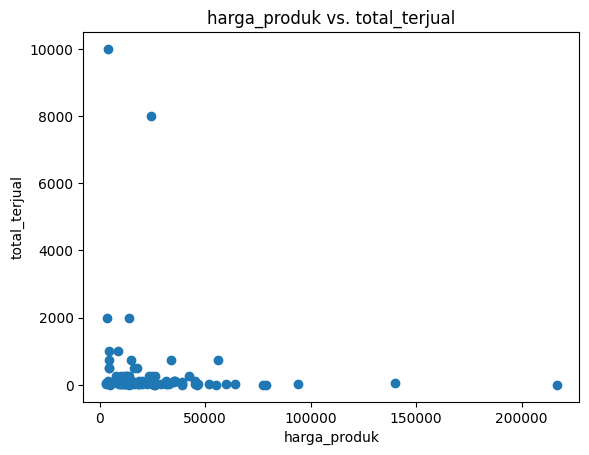

In [224]:
import matplotlib.pyplot as plt

plt.scatter(df_ana['harga_produk'], df_ana['total_terjual'])

plt.xlabel('harga_produk')
plt.ylabel('total_terjual')
plt.title('harga_produk vs. total_terjual')

plt.show()

##### \# Insight: <br>
Karena bisa dibilang bahwa harga produk mempengaruhi total penjualan dan begitu juga sebaliknya, maka untuk mendapatkan kandidat produk dengan prospek pendapatan terbesar, perlu memperhatikan kedua variabel tersebut dan mencari produk dengan hasil kali dari harga dan total penjualan (artinya total pendapatan) tertinggi.

## 5. Conclusion

Untuk mengambil kesimpulan akhir, saya akan menunjukkan 5 produk dengan profit per bulan terbesar.

In [225]:
df_final = df_ana.copy()
df_final['netto'] = df_profit['netto']
df_final.sort_values('netto', ascending=False).head()

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating,jabodetabek,pendapatan,netto
51,Kylafood Seblak Tulang Rawan,24500,kylafood,Bandung,8000,4.9,False,196000000,5880000
55,PAKET HEMAT (2 Seblak original - Seblak Karuhu...,56250,kylafood,Bandung,750,4.9,False,42187500,1265625
5,SEBLAK INSTANT TERMURAH,3999,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,10000,4.8,True,39990000,1199700
38,Seblak Mommy,13900,Gerai Snack Official Shop,Kab. Tangerang,2000,4.6,True,27800000,834000
41,SEBLAK JELETET MURNI ( BOHAYY),34000,Seblak Jeletet Murni,Jakarta Pusat,750,4.8,True,25500000,765000


Dengan 5 produk di atas sebagai kandidat, saya akan memperbarui tabel saya dengan harga, penjualan, pendapatan dan netto dropship.

In [226]:
df_final[['harga_produk', 'total_terjual', 'pendapatan']] = df_profit[['harga_produk', 'total_terjual', 'pendapatan']]
df_final = df_final.sort_values('netto', ascending=False, ignore_index=True).head()

In [227]:
display(df_final)
print(f'Expected monthly netto value: {df_final["netto"].sum()}')

,nama_produk,harga_produk,nama_penjual,kota_toko,total_terjual,rating,jabodetabek,pendapatan,netto
0,Kylafood Seblak Tulang Rawan,26950,kylafood,Bandung,2400,4.9,False,64680000,5880000
1,PAKET HEMAT (2 Seblak original - Seblak Karuhu...,61875,kylafood,Bandung,225,4.9,False,13921875,1265625
2,SEBLAK INSTANT TERMURAH,4398,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,3000,4.8,True,13196700,1199700
3,Seblak Mommy,15290,Gerai Snack Official Shop,Kab. Tangerang,600,4.6,True,9174000,834000
4,SEBLAK JELETET MURNI ( BOHAYY),37400,Seblak Jeletet Murni,Jakarta Pusat,225,4.8,True,8415000,765000


Expected monthly netto value: 9944325


***
### Kesimpulan
Dengan menjual kelima produk di atas dengan cara dropship, mempertimbangkan komisi 10% dari harga produk dan penjualan 1% dari total penjualan produk setiap hari, maka saya akan mendapatkan pendapatan bersih sebesar 9944325 (9.9 juta) rupiah setiap bulan. <br>
Target awal saya untuk memperoleh pendapatan sebesar 2 juta rupiah setiap bulan dapat tercapai hanya dengan melakukan dropship untuk 1 produk saja: 'Kylafood Seblak Tulang Rawan' <br>
atau bisa juga dengan menjalankan dropship untuk kombinasi 2 dari 3 produk: 'PAKET HEMAT (2 Seblak original - Seblak Karuhun - Cireng Bumbu Rujak)', 'SEBLAK INSTANT TERMURAH', 'Seblak Mommy'.
<br><br>
Semakin banyak variasi produk yang saya jual, semakin besar pula investasi waktu/tenaga yang harus saya keluarkan, tapi semakin besar juga pendapatan per bulan saya. <br>
***